In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/worserevisit3.csv")
sec1 = data[['latedate', 'Spotdollar', '2monthcrude', '2monthcorn','2monthurea']][1248:]
sec1 = sec1.dropna()
print(sec1.shape)
sec1new = np.array(sec1)
sec1new = pd.DataFrame(sec1new)
sec1new.columns = ['latedate', 'Spotdollar', '2monthcrude', '2monthcorn','2monthurea']
sec1new

(143, 5)


,latedate,Spotdollar,2monthcrude,2monthcorn,2monthurea
0,8/3/2015,97.494,45.56,376.5,278
1,8/4/2015,97.931,46.13,378.75,278
2,8/5/2015,97.958,45.55,383.25,280
3,8/7/2015,97.563,44.36,383.75,281
4,8/10/2015,97.159,45.66,401,282
5,8/11/2015,97.29,43.87,387.5,283
6,8/14/2015,96.52,43.11,375.5,280
7,8/17/2015,96.806,42.41,374.5,280
8,8/18/2015,97.04,43.12,377.25,278
9,8/19/2015,96.359,41.27,378.5,277


In [21]:
X=sec1[['Spotdollar', '2monthcrude', '2monthcorn']].values
y=sec1['2monthurea'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=1)
forest=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.0,n_estimators=150, n_jobs=1, oob_score=False, random_state=None,verbose=0, warm_start=False)
forest.fit(X_train, y_train)
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred),r2_score(y_test,y_test_pred)))

MSE train: 13.701, test: 104.076
R^2 train: 0.974, test: 0.794


In [22]:
forest.feature_importances_

array([ 0.22455706,  0.68670982,  0.08873312])

In [23]:
ureapredicted = forest.predict(X)
ureapredicted = pd.DataFrame(ureapredicted)
ureapredicted.columns = ['Predicted Urea_Sec1_Suggest']
ureapredicted

,Predicted Urea_Sec1_Suggest
0,270.625000
1,269.660000
2,271.732222
3,271.941905
4,252.735943
5,259.081905
6,278.538333
7,277.525000
8,277.218333
9,276.371667


In [40]:
#how to add a new column, predicted urea
sec1new['Predicted Urea_Sec1_Suggest'] = ureapredicted
sec1new

,latedate,Spotdollar,2monthcrude,2monthcorn,2monthurea,Predicted Urea_Sec1_Suggest
0,8/3/2015,97.494,45.56,376.5,278,270.625000
1,8/4/2015,97.931,46.13,378.75,278,269.660000
2,8/5/2015,97.958,45.55,383.25,280,271.732222
3,8/7/2015,97.563,44.36,383.75,281,271.941905
4,8/10/2015,97.159,45.66,401,282,252.735943
5,8/11/2015,97.29,43.87,387.5,283,259.081905
6,8/14/2015,96.52,43.11,375.5,280,278.538333
7,8/17/2015,96.806,42.41,374.5,280,277.525000
8,8/18/2015,97.04,43.12,377.25,278,277.218333
9,8/19/2015,96.359,41.27,378.5,277,276.371667


## Want to Compare Monthly

In [25]:
#monthly predictions
oct_15 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][0:18]
nov_15 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][18:39]
dec_15 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][39:61]
jan_16 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][61:80]
feb_16 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][80:102]
mar_16 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][102:122]
apr_16 = sec1new[['latedate','2monthurea','Predicted Urea_Sec1_Suggest']][122:143]

In [26]:
#putting actual monthly urea avg into an array which I can then put into a dataframe so then I can plot
import numpy as np
actual_monthly_avg = np.array([oct_15['2monthurea'].mean(),
                               nov_15['2monthurea'].mean(),dec_15['2monthurea'].mean(),
                               jan_16['2monthurea'].mean(),feb_16['2monthurea'].mean(),
                               mar_16['2monthurea'].mean(),apr_16['2monthurea'].mean()])
actual_monthly_avg

array([ 276.77777778,  257.57142857,  253.36363636,  242.94736842,
        232.36363636,  204.15      ,  225.71428571])

In [27]:
pred_monthly_avg = np.array([oct_15['Predicted Urea_Sec1_Suggest'].mean(),
                               nov_15['Predicted Urea_Sec1_Suggest'].mean(),dec_15['Predicted Urea_Sec1_Suggest'].mean(),
                               jan_16['Predicted Urea_Sec1_Suggest'].mean(),feb_16['Predicted Urea_Sec1_Suggest'].mean(),
                               mar_16['Predicted Urea_Sec1_Suggest'].mean(),apr_16['Predicted Urea_Sec1_Suggest'].mean()])
pred_monthly_avg

array([ 270.2834122 ,  258.13754031,  253.71533528,  242.38435336,
        233.41837662,  203.92352222,  225.7665994 ])

In [28]:
#putting the arrays into a dataframe
from datetime import datetime
actual_monthly_avg = pd.DataFrame(actual_monthly_avg)
pred_monthly_avg = pd.DataFrame(pred_monthly_avg)
monthly_date = ['10/2015','11/2015','12/2015','1/2016','2/2016','3/2016','4/2016']
monthly_date = pd.to_datetime(monthly_date)
monthly_date.strftime('%b-%y')
monthly_date = pd.DataFrame(monthly_date)
monthly_date.columns = ['Monthly_Date']

In [29]:
upperbound = pred_monthly_avg + pred_monthly_avg.std()
lowerbound = pred_monthly_avg - pred_monthly_avg.std()

In [30]:
monthly_date['Actual_Monthly_Avg'] = actual_monthly_avg
monthly_date['Pred_Monthly_Avg'] = pred_monthly_avg
monthly_date['Upper_Bound'] = upperbound
monthly_date['Lower_Bound'] = lowerbound
monthly_avg = monthly_date
print(monthly_avg.dtypes)
monthly_avg

Monthly_Date          datetime64[ns]
Actual_Monthly_Avg           float64
Pred_Monthly_Avg             float64
Upper_Bound                  float64
Lower_Bound                  float64
dtype: object


,Monthly_Date,Actual_Monthly_Avg,Pred_Monthly_Avg,Upper_Bound,Lower_Bound
0,2015-10-01,276.777778,270.283412,292.565527,248.001297
1,2015-11-01,257.571429,258.137540,280.419655,235.855425
2,2015-12-01,253.363636,253.715335,275.997450,231.433220
3,2016-01-01,242.947368,242.384353,264.666468,220.102238
4,2016-02-01,232.363636,233.418377,255.700492,211.136262
5,2016-03-01,204.150000,203.923522,226.205637,181.641407
6,2016-04-01,225.714286,225.766599,248.048714,203.484484


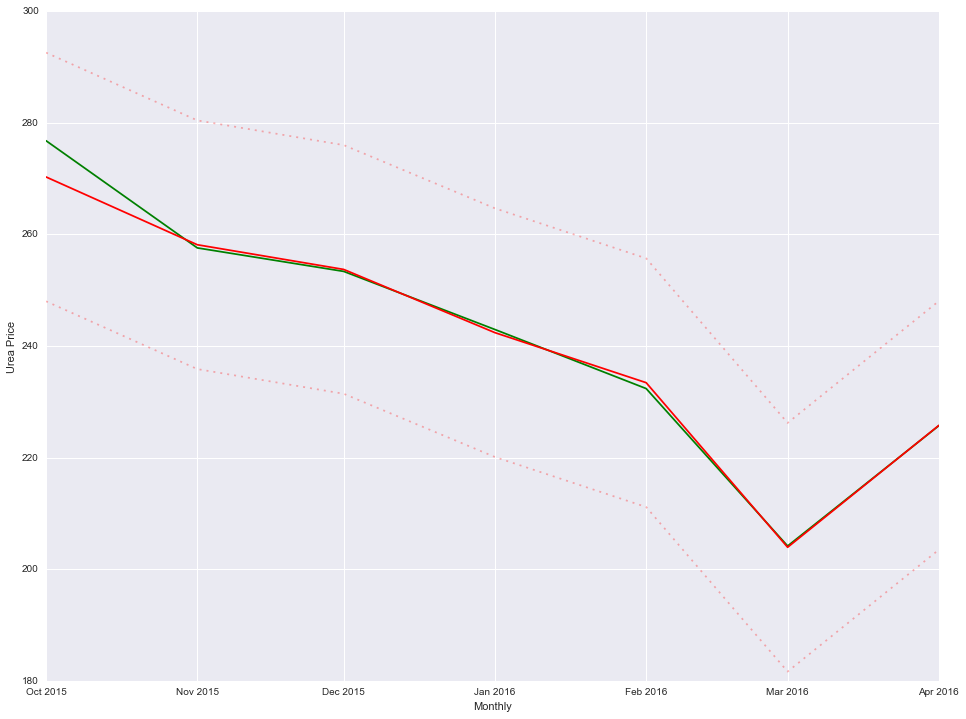

In [31]:
#basic plot of monthly avg actual vs predicted
import matplotlib.pyplot as plt
%matplotlib inline

x = (monthly_avg['Monthly_Date'])
y1 = (monthly_avg['Actual_Monthly_Avg'])
y2 = (monthly_avg['Pred_Monthly_Avg'])
lowerbound2 = (monthly_avg['Lower_Bound'])
upperbound2 = (monthly_avg['Upper_Bound'])

plt.figure(figsize=(16,12))
plt.plot(x,y1,'g')
plt.plot(x,y2,'r')
plt.plot(x,lowerbound2,'r--',dashes=(2,5),alpha=0.3)
plt.plot(x,upperbound2,'r--',dashes=(2,5),alpha=0.3)
#plt.fill_between(x,lowerbound2,upperbound2,color='red',alpha=0.5)
plt.xlabel('Monthly')
plt.ylabel('Urea Price')
plt.show()

In [32]:
newpred2 = data[['latedate','Spotdollar','2monthcrude','2monthcorn']][1461:3230]
newpred = data[['Spotdollar', '2monthcrude', '2monthcorn']][1461:3230]
newpred2 

,latedate,Spotdollar,2monthcrude,2monthcorn
1461,3/1/2016,98.352000,36.15,355.750000
1462,3/2/2016,98.214000,36.30,356.250000
1463,3/3/2016,97.592000,36.33,356.500000
1464,3/4/2016,97.340000,37.75,358.250000
1465,3/5/2016,97.340000,37.75,358.250000
1466,3/6/2016,97.340000,37.75,358.250000
1467,3/7/2016,97.071000,39.82,359.000000
1468,3/8/2016,97.209000,38.42,360.500000
1469,3/9/2016,97.173000,40.07,359.500000
1470,3/10/2016,96.066000,39.40,362.750000


In [33]:
#new predictions
newpred_predicted = forest.predict(newpred)
newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
df_new_pred = pd.DataFrame(newpred_predicted)
newpred2['Predicted Urea_Sec1_Suggest'] = df_new_pred
newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
newpred2.columns = ['latedate','Spotdollar', '2monthcrude','2monthcorn','Predicted Urea_Sec1_Suggest']
newpred2

,latedate,Spotdollar,2monthcrude,2monthcorn,Predicted Urea_Sec1_Suggest
0,3/1/2016,98.352,36.15,355.75,222.328
1,3/2/2016,98.214,36.3,356.25,227.364
2,3/3/2016,97.592,36.33,356.5,228.882
3,3/4/2016,97.34,37.75,358.25,230.514
4,3/5/2016,97.34,37.75,358.25,230.514
5,3/6/2016,97.34,37.75,358.25,230.514
6,3/7/2016,97.071,39.82,359,266.867
7,3/8/2016,97.209,38.42,360.5,232.754
8,3/9/2016,97.173,40.07,359.5,268.847
9,3/10/2016,96.066,39.4,362.75,266.06


In [34]:
#monthly predictions for may_16 to feb_17
may_16 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][0:31]
jun_16 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][31:61]
jul_16 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][61:92]
aug_16 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][92:122]
sep_16 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][122:153]
oct_16 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][153:184]
nov_16 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][184:214]
dec_16 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][214:245]
jan_17 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][245:275]
feb_17 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][275:306]
mar_17 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][306:337]
apr_17 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][337:365]
may_17 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][365:396]
jun_17 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][396:426]
jul_17 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][426:457]
aug_17 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][457:487]
sep_17 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][487:518]
oct_17 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][518:549]
nov_17 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][549:579]
dec_17 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][579:610]
jan_18 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][610:640]
feb_18 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][640:671]
mar_18 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][671:702]
apr_18 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][702:730]
may_18 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][730:761]
jun_18 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][761:791]
jul_18 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][791:822]
aug_18 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][822:852]
sep_18 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][852:883]
oct_18 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][883:914]
nov_18 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][914:944]
dec_18 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][944:975]
jan_19 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][975:1005]
feb_19 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1005:1036]
mar_19 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1036:1067]
apr_19 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1067:1095]
may_19 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1095:1126]
jun_19 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1126:1156]
jul_19 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1156:1187]
aug_19 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1187:1217]
sep_19 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1217:1248]
oct_19 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1248:1279]
nov_19 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1279:1309]
dec_19 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1309:1340]
jan_20 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1340:1370]
feb_20 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1370:1401]
mar_20 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1401:1432]
apr_20 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1432:1461]
may_20 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1461:1492]
jun_20 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1492:1522]
jul_20 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1522:1553]
aug_20 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1553:1583]
sep_20 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1583:1614]
oct_20 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1614:1645]
nov_20 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1645:1675]
dec_20 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1675:1706]
jan_21 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1706:1736]
feb_21 = newpred2[['latedate','Predicted Urea_Sec1_Suggest']][1736:1767]

In [35]:
new_pred_monthly_avg = np.array([may_16['Predicted Urea_Sec1_Suggest'].mean(),jun_16['Predicted Urea_Sec1_Suggest'].mean(),
                                 jul_16['Predicted Urea_Sec1_Suggest'].mean(),aug_16['Predicted Urea_Sec1_Suggest'].mean(),
                                 sep_16['Predicted Urea_Sec1_Suggest'].mean(),oct_16['Predicted Urea_Sec1_Suggest'].mean(),
                                 nov_16['Predicted Urea_Sec1_Suggest'].mean(),dec_16['Predicted Urea_Sec1_Suggest'].mean(),
                                 jan_17['Predicted Urea_Sec1_Suggest'].mean(),feb_17['Predicted Urea_Sec1_Suggest'].mean(),
                                 mar_17['Predicted Urea_Sec1_Suggest'].mean(),apr_17['Predicted Urea_Sec1_Suggest'].mean(),
                                 may_17['Predicted Urea_Sec1_Suggest'].mean(),jun_17['Predicted Urea_Sec1_Suggest'].mean(),
                                 jul_17['Predicted Urea_Sec1_Suggest'].mean(),aug_17['Predicted Urea_Sec1_Suggest'].mean(),
                                 sep_17['Predicted Urea_Sec1_Suggest'].mean(),oct_17['Predicted Urea_Sec1_Suggest'].mean(),
                                 nov_17['Predicted Urea_Sec1_Suggest'].mean(),dec_17['Predicted Urea_Sec1_Suggest'].mean(),
                                 jan_18['Predicted Urea_Sec1_Suggest'].mean(),feb_18['Predicted Urea_Sec1_Suggest'].mean(),
                                 mar_18['Predicted Urea_Sec1_Suggest'].mean(),apr_18['Predicted Urea_Sec1_Suggest'].mean(),
                                 may_18['Predicted Urea_Sec1_Suggest'].mean(),jun_18['Predicted Urea_Sec1_Suggest'].mean(),
                                 jul_18['Predicted Urea_Sec1_Suggest'].mean(),aug_18['Predicted Urea_Sec1_Suggest'].mean(),
                                 sep_18['Predicted Urea_Sec1_Suggest'].mean(),oct_18['Predicted Urea_Sec1_Suggest'].mean(),
                                 nov_18['Predicted Urea_Sec1_Suggest'].mean(),dec_18['Predicted Urea_Sec1_Suggest'].mean(),
                                 jan_19['Predicted Urea_Sec1_Suggest'].mean(),feb_19['Predicted Urea_Sec1_Suggest'].mean(),
                                 mar_19['Predicted Urea_Sec1_Suggest'].mean(),apr_19['Predicted Urea_Sec1_Suggest'].mean(),
                                 may_19['Predicted Urea_Sec1_Suggest'].mean(),jun_19['Predicted Urea_Sec1_Suggest'].mean(),
                                 jul_19['Predicted Urea_Sec1_Suggest'].mean(),aug_19['Predicted Urea_Sec1_Suggest'].mean(),
                                 sep_19['Predicted Urea_Sec1_Suggest'].mean(),oct_19['Predicted Urea_Sec1_Suggest'].mean(),
                                 nov_19['Predicted Urea_Sec1_Suggest'].mean(),dec_19['Predicted Urea_Sec1_Suggest'].mean(),
                                 jan_20['Predicted Urea_Sec1_Suggest'].mean(),feb_20['Predicted Urea_Sec1_Suggest'].mean(),
                                 mar_20['Predicted Urea_Sec1_Suggest'].mean(),apr_20['Predicted Urea_Sec1_Suggest'].mean(),
                                 may_20['Predicted Urea_Sec1_Suggest'].mean(),jun_20['Predicted Urea_Sec1_Suggest'].mean(),
                                 jul_20['Predicted Urea_Sec1_Suggest'].mean(),aug_20['Predicted Urea_Sec1_Suggest'].mean(),
                                 sep_20['Predicted Urea_Sec1_Suggest'].mean(),oct_20['Predicted Urea_Sec1_Suggest'].mean(),
                                 nov_20['Predicted Urea_Sec1_Suggest'].mean(),dec_20['Predicted Urea_Sec1_Suggest'].mean(),
                                 jan_21['Predicted Urea_Sec1_Suggest'].mean(),feb_21['Predicted Urea_Sec1_Suggest'].mean()])
new_pred_monthly_avg

array([ 253.21664209,  220.94548836,  206.69978495,  203.63355556,
        203.92666667,  203.92666667,  203.79777778,  203.15333333,
        203.03733333,  203.02258065,  203.06602151,  204.49904762,
        205.73204301,  206.53333333,  206.76989247,  206.70666667,
        206.79741935,  207.01333333,  207.23755556,  209.24387097,
        211.51111111,  211.51268817,  212.58322581,  215.68857143,
        215.66731183,  216.27866667,  233.16086022,  236.00733333,
        236.66752688,  236.64193548,  236.07422222,  237.32752688,
        242.28162963,  268.50388889,  278.14951613,  277.72904762,
        276.76583973,  274.8627672 ,  272.77051971,  271.81848148,
        268.57532258,  262.37188172,  259.70966667,  259.44494624,
        258.16955556,  256.88129032,  257.02860215,  257.45793103,
        257.6288172 ,  257.92955556,  257.7688172 ,  257.73879365,
        257.38491551,  255.581532  ,  252.12642787,  251.77135494,
        251.98803595,  252.72129222])

In [36]:
new_pred_monthly_avg = pd.DataFrame(new_pred_monthly_avg)
new_monthly_date = ['5/2016','6/2016','7/2016','8/2016','9/2016','10/2016','11/2016','12/2016','1/2017','2/2017','3/2017',
                    '4/2017','5/2017','6/2017','7/2017','8/2017','9/2017','10/2017','11/2017','12/2017',
                   '1/2018','2/2018','3/2018','4/2018','5/2018','6/2018','7/2018','8/2018','9/2018','10/2018','11/2018','12/2018',
                   '1/2019','2/2019','3/2019','4/2019','5/2019','6/2019','7/2019','8/2019','9/2019','10/2019','11/2019','12/2019',
                   '1/2020','2/2020','3/2020','4/2020','5/2020','6/2020','7/2020','8/2020','9/2020','10/2020','11/2020','12/2020',
                   '1/2021','2/2021']
new_monthly_date = pd.to_datetime(new_monthly_date)
new_monthly_date.strftime('%b-%y')
new_monthly_date = pd.DataFrame(new_monthly_date)
new_monthly_date.columns = ['Monthly_Date']
new_upperbound = new_pred_monthly_avg + new_pred_monthly_avg.std()
new_lowerbound = new_pred_monthly_avg - new_pred_monthly_avg.std()
new_monthly_date['Pred_Monthly_Avg'] = new_pred_monthly_avg
new_monthly_date['Upper_Bound'] = new_upperbound
new_monthly_date['Lower_Bound'] = new_lowerbound
new_monthly_avg = new_monthly_date
print(new_monthly_avg.dtypes)
new_monthly_avg

Monthly_Date        datetime64[ns]
Pred_Monthly_Avg           float64
Upper_Bound                float64
Lower_Bound                float64
dtype: object


,Monthly_Date,Pred_Monthly_Avg,Upper_Bound,Lower_Bound
0,2016-05-01,253.216642,279.524151,226.909133
1,2016-06-01,220.945488,247.252997,194.637980
2,2016-07-01,206.699785,233.007294,180.392276
3,2016-08-01,203.633556,229.941064,177.326047
4,2016-09-01,203.926667,230.234175,177.619158
5,2016-10-01,203.926667,230.234175,177.619158
6,2016-11-01,203.797778,230.105286,177.490269
7,2016-12-01,203.153333,229.460842,176.845825
8,2017-01-01,203.037333,229.344842,176.729825
9,2017-02-01,203.022581,229.330089,176.715072


In [37]:
frames = [monthly_date,new_monthly_date]
combined = pd.concat(frames)
combined

,Actual_Monthly_Avg,Lower_Bound,Monthly_Date,Pred_Monthly_Avg,Upper_Bound
0,276.777778,248.001297,2015-10-01,270.283412,292.565527
1,257.571429,235.855425,2015-11-01,258.137540,280.419655
2,253.363636,231.433220,2015-12-01,253.715335,275.997450
3,242.947368,220.102238,2016-01-01,242.384353,264.666468
4,232.363636,211.136262,2016-02-01,233.418377,255.700492
5,204.150000,181.641407,2016-03-01,203.923522,226.205637
6,225.714286,203.484484,2016-04-01,225.766599,248.048714
0,NaN,226.909133,2016-05-01,253.216642,279.524151
1,NaN,194.637980,2016-06-01,220.945488,247.252997
2,NaN,180.392276,2016-07-01,206.699785,233.007294


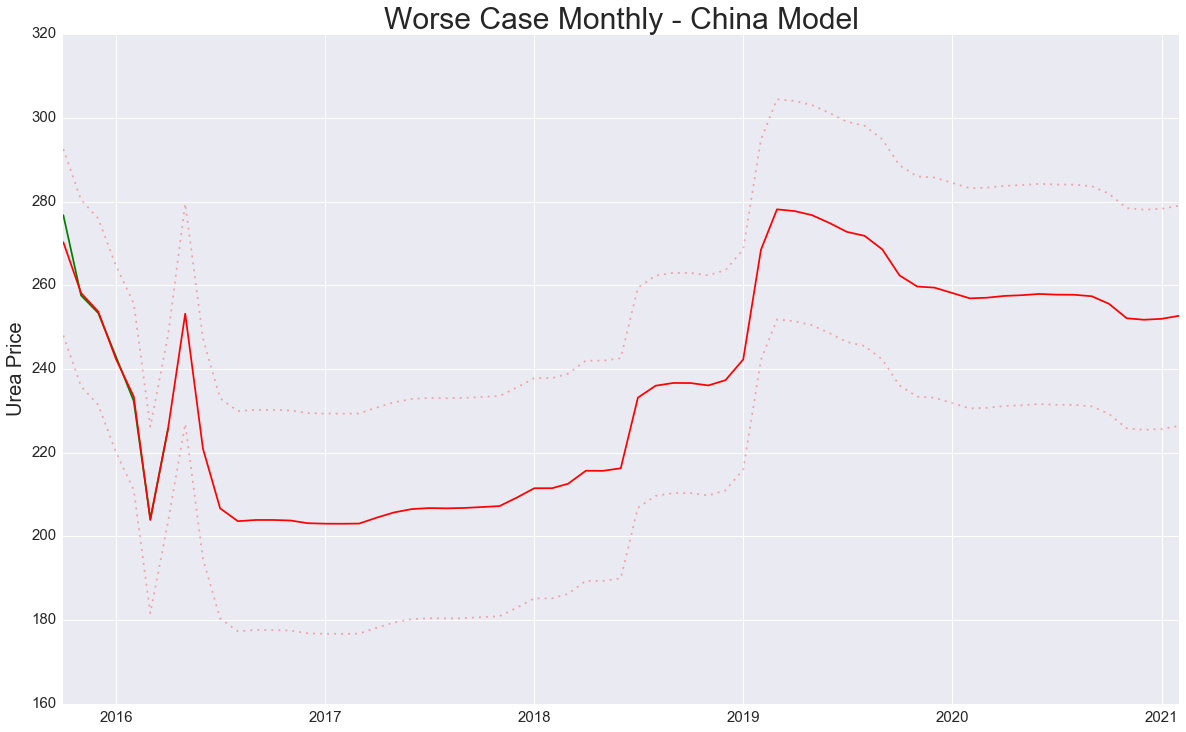

In [38]:

x = (combined['Monthly_Date'])
y1 = (combined['Actual_Monthly_Avg'])
y2 = (combined['Pred_Monthly_Avg'])
lowerboundcom = (combined['Lower_Bound'])
upperboundcom = (combined['Upper_Bound'])

fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
ax.plot(x,y1,'g')
ax.plot(x,y2,'r')
ax.plot(x,lowerboundcom,'r--',dashes=(2,5),alpha=0.3)
ax.plot(x,upperboundcom,'r--',dashes=(2,5),alpha=0.3)

#plt.ylabel('Urea Price')
ax.set_title('Worse Case Monthly - China Model', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Urea Price',size=(20))
plt.show()

## Compare daily 

In [41]:
sec1whole = sec1new
sec1whole['Predicted Urea_Sec1_Suggest'].describe()

count    143.000000
mean     240.753868
std       21.821804
min      191.646667
25%      227.897278
50%      243.993333
75%      254.730876
max      278.538333
Name: Predicted Urea_Sec1_Suggest, dtype: float64

In [42]:
upperbound_whole = sec1whole['Predicted Urea_Sec1_Suggest'] + sec1whole['Predicted Urea_Sec1_Suggest'].std()
lowerbound_whole = sec1whole['Predicted Urea_Sec1_Suggest'] - sec1whole['Predicted Urea_Sec1_Suggest'].std()
sec1whole['Upper_Bound'] = upperbound_whole
sec1whole['Lower_Bound'] = lowerbound_whole
sec1whole

,latedate,Spotdollar,2monthcrude,2monthcorn,2monthurea,Predicted Urea_Sec1_Suggest,Upper_Bound,Lower_Bound
0,8/3/2015,97.494,45.56,376.5,278,270.625000,292.446804,248.803196
1,8/4/2015,97.931,46.13,378.75,278,269.660000,291.481804,247.838196
2,8/5/2015,97.958,45.55,383.25,280,271.732222,293.554026,249.910418
3,8/7/2015,97.563,44.36,383.75,281,271.941905,293.763709,250.120101
4,8/10/2015,97.159,45.66,401,282,252.735943,274.557747,230.914139
5,8/11/2015,97.29,43.87,387.5,283,259.081905,280.903709,237.260101
6,8/14/2015,96.52,43.11,375.5,280,278.538333,300.360137,256.716529
7,8/17/2015,96.806,42.41,374.5,280,277.525000,299.346804,255.703196
8,8/18/2015,97.04,43.12,377.25,278,277.218333,299.040137,255.396529
9,8/19/2015,96.359,41.27,378.5,277,276.371667,298.193471,254.549863


In [43]:
#new predictions daily
newpred2 = data[['latedate','Spotdollar','2monthcrude','2monthcorn']][1461:3230]
newpred = data[['Spotdollar', '2monthcrude', '2monthcorn']][1461:3230]
newpred_predicted_whole = forest.predict(newpred)
newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
df_new_pred_whole = pd.DataFrame(newpred_predicted_whole)
newpred2['Predicted Urea_Sec1_Suggest'] = df_new_pred_whole
newpred2 = np.array(newpred2)
newpred2 = pd.DataFrame(newpred2)
newpred2.columns = ['latedate','Spotdollar', '2monthcrude','2monthcorn','Predicted Urea_Sec1_Suggest']
upperbound_wholenew = newpred2['Predicted Urea_Sec1_Suggest'] + newpred2['Predicted Urea_Sec1_Suggest'].std()
lowerbound_wholenew = newpred2['Predicted Urea_Sec1_Suggest'] - newpred2['Predicted Urea_Sec1_Suggest'].std()
newpred2['Upper_Bound'] = upperbound_wholenew
newpred2['Lower_Bound'] = lowerbound_wholenew
newpred2['Predicted Urea_Sec1_Suggest'].mean()


235.58200297813906

In [44]:
#this shows that I need to change the lastdate object to a date
frames_whole = [sec1whole,newpred2]
combined_whole = pd.concat(frames_whole)
combined_whole.dtypes

2monthcorn                     object
2monthcrude                    object
2monthurea                     object
Lower_Bound                    object
Predicted Urea_Sec1_Suggest    object
Spotdollar                     object
Upper_Bound                    object
latedate                       object
dtype: object

In [45]:
#changes lastdate column to datetime format
from datetime import datetime
new_date = combined_whole[['latedate']]
combined_whole['latedate'] = pd.to_datetime(combined_whole['latedate'])
print(new_date.dtypes)
combined_whole.tail()
#combined_whole.to_csv("")

latedate    object
dtype: object


,2monthcorn,2monthcrude,2monthurea,Lower_Bound,Predicted Urea_Sec1_Suggest,Spotdollar,Upper_Bound,latedate
1762,418.671,47.9,NaN,226.671,252.908,90.0351,279.145,2020-12-27
1763,418.753,47.9,NaN,226.671,252.908,90.0263,279.145,2020-12-28
1764,418.836,48,NaN,226.671,252.908,90.0175,279.145,2020-12-29
1765,418.918,48,NaN,226.671,252.908,90.0088,279.145,2020-12-30
1766,419,48,NaN,226.671,252.908,90,279.145,2020-12-31


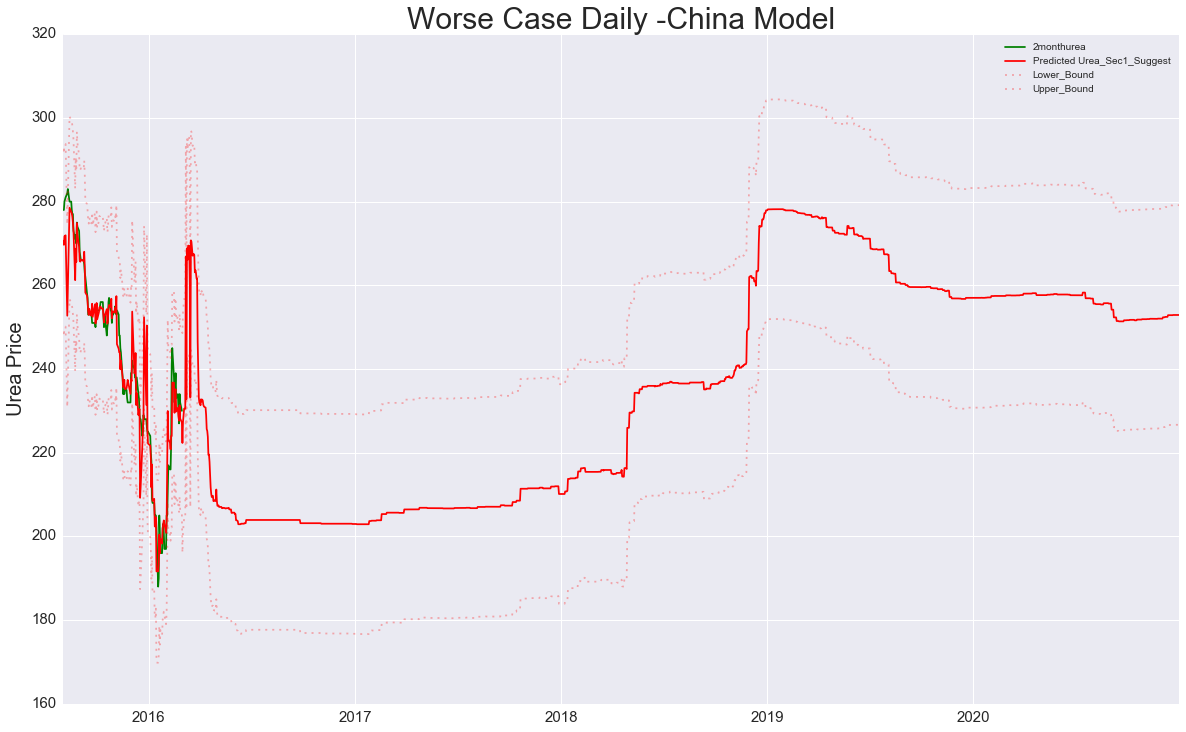

In [46]:
x_whole = (combined_whole['latedate'])
y1_whole = (combined_whole['2monthurea'])
y2_whole = (combined_whole['Predicted Urea_Sec1_Suggest'])
lowerbound_whole = (combined_whole['Lower_Bound'])
upperbound_whole = (combined_whole['Upper_Bound'])

fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
ax.plot(x_whole,y1_whole,'g')
ax.plot(x_whole,y2_whole,'r')
ax.plot(x_whole,lowerbound_whole,'r--',dashes=(2,5),alpha=0.3)
ax.plot(x_whole,upperbound_whole,'r--',dashes=(2,5),alpha=0.3)

ax.set_title('Worse Case Daily -China Model', size=(30))
ax.tick_params(axis='x',which='major',labelsize=15)
ax.tick_params(axis='y',which='major',labelsize=15)
ax.set_ylabel('Urea Price',size=(20))
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
#ax.set_xticklabels(x_whole,rotation=30)
plt.show()